In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import measure, morphology, filters, color, util, io, feature, data, exposure
from scipy import ndimage as ndi
from skimage.util import random_noise, compare_images, invert
import skimage.morphology
from skimage.segmentation import watershed
from skimage.feature import peak_local_max, corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse
from skimage.filters import meijering, sato, frangi, hessian

F6_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F6Spine_AP.jpg'
F6_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F6Spine_Crop_AP.jpg'
F10_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F10Spine_AP.jpg'
F10_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F10Spine_Crop_AP.jpg'
F13_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F13Spine_AP.jpg'
F13_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F13Spine_Crop_AP.jpg'
F25_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F25Spine_AP.jpg'
F25_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F25Spine_Crop_AP.jpg'
F31_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F31Spine_AP.jpg'
F31_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F31Spine_Crop_AP.jpg'
F37_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F37Spine_AP.jpg'
F37_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F37Spine_Crop_AP.jpg'
F38_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F38Spine_AP.jpg'
F38_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F38Spine_Crop_AP.jpg'
F63_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F63Spine_AP.jpg'
F63_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F63Spine_Crop_AP.jpg'
F79_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F79Spine_AP.jpg'
F79_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/F79Spine_Crop_AP.jpg'
M6_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/M6Spine_AP.jpg'
M6_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/M6Spine_Crop_AP.jpg'
M20_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/M20Spine_AP.jpg'
M20_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/M20Spine_Crop_AP.jpg'
M22_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/M22Spine_AP.jpg'
M22_cropped_file = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spine_xray/M22Spine_Crop_AP.jpg'

F6 = io.imread(F6_file)
F6_cropped = io.imread(F6_cropped_file)
F10 = io.imread(F10_file)
F10_cropped = io.imread(F10_cropped_file)
F13 = io.imread(F13_file)
F13_cropped = io.imread(F13_cropped_file)
F25 = io.imread(F25_file)
F25_cropped = io.imread(F25_cropped_file)
F31 = io.imread(F31_file)
F31_cropped = io.imread(F31_cropped_file)
F37 = io.imread(F37_file)
F37_cropped = io.imread(F37_cropped_file)
F38 = io.imread(F38_file)
F38_cropped = io.imread(F38_cropped_file)
F63 = io.imread(F63_file)
F63_cropped = io.imread(F63_cropped_file)
F79 = io.imread(F79_file)
F79_cropped = io.imread(F79_cropped_file)
M6 = io.imread(M6_file)
M6_cropped = io.imread(M6_cropped_file)
M20 = io.imread(M20_file)
M20_cropped = io.imread(M20_cropped_file)
M22 = io.imread(M22_file)
M22_cropped = io.imread(M22_cropped_file)

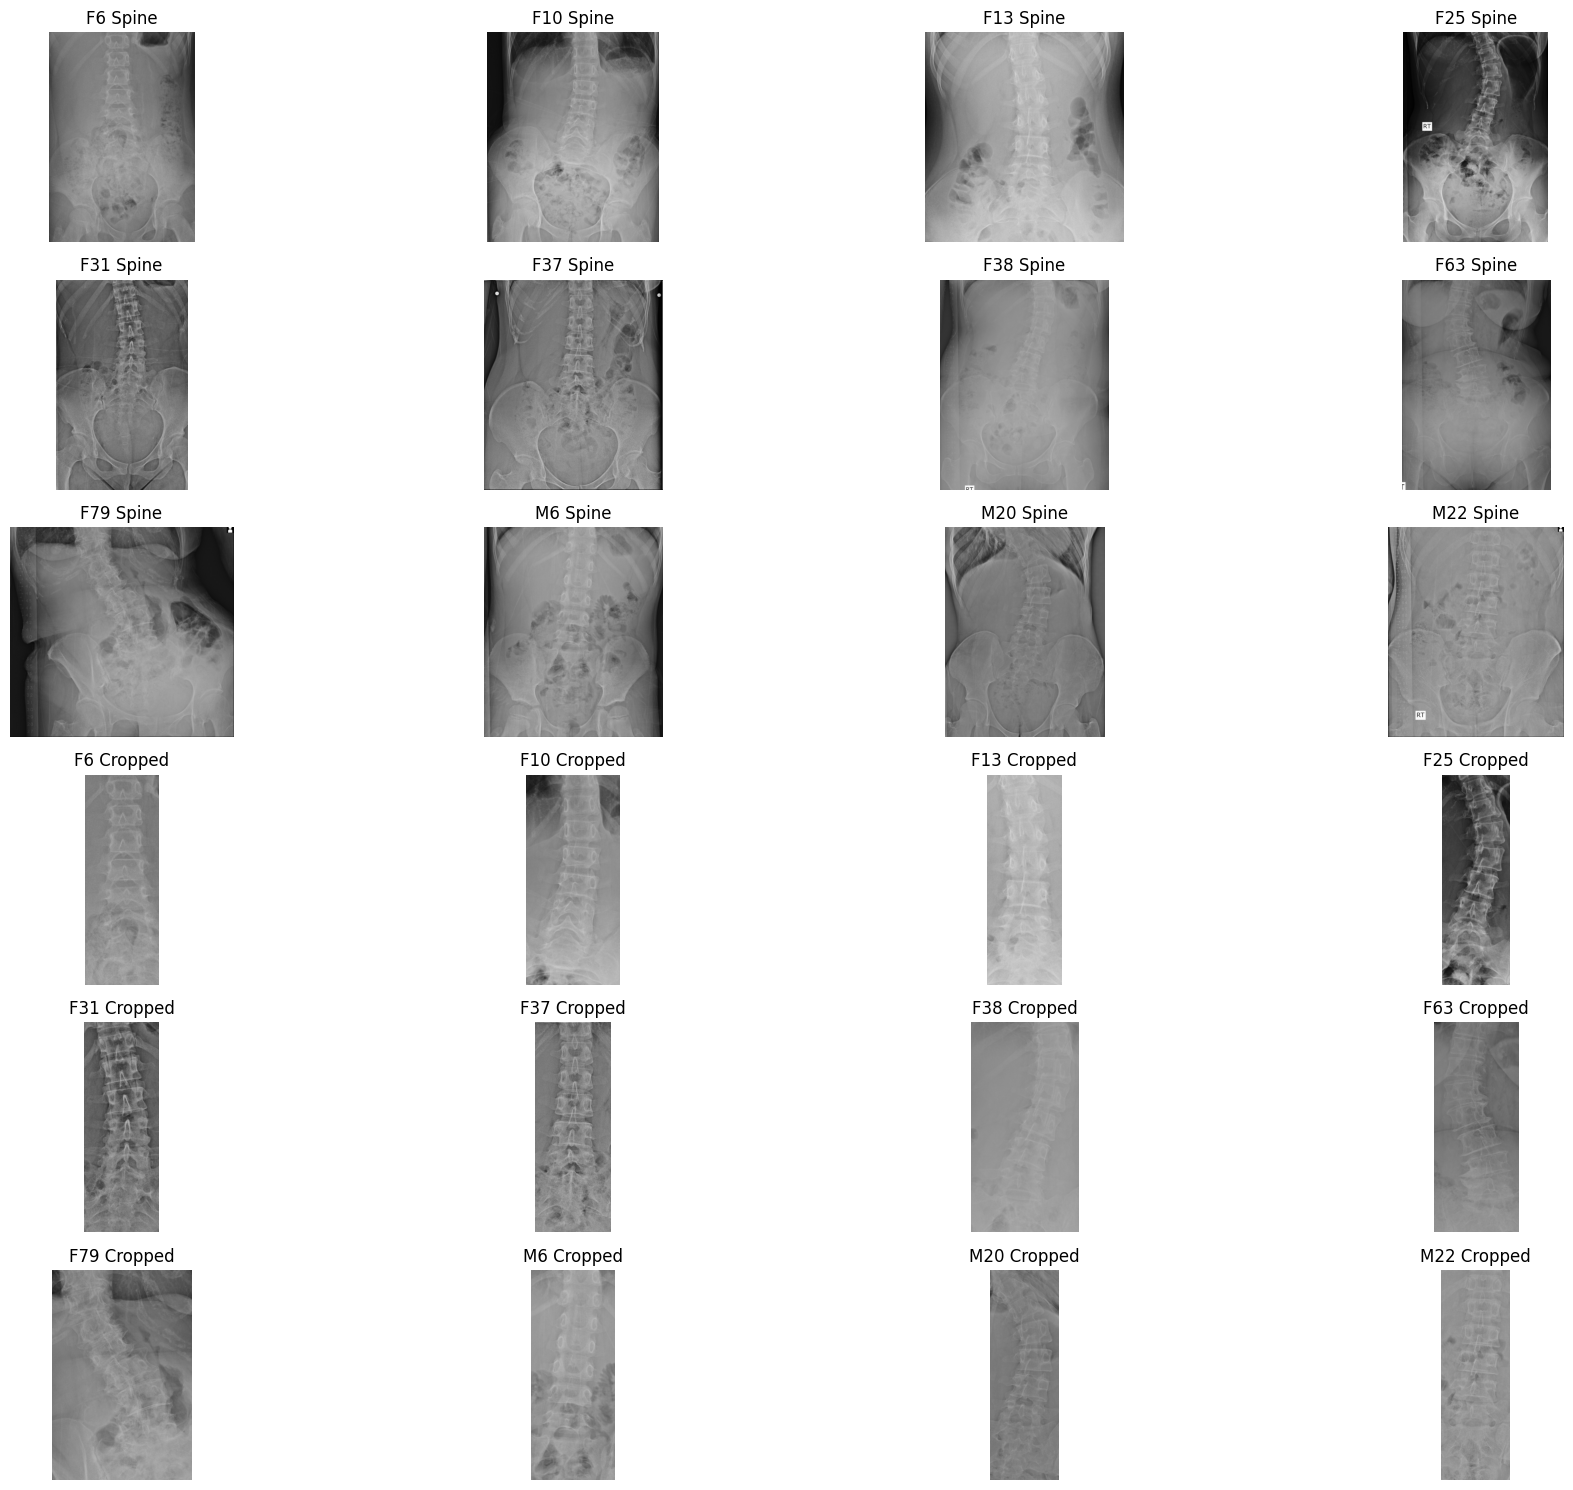

In [37]:
# Display all full and cropped spine images in a 3x4 grid
images= [F6, F10, F13, F25, F31, F37, F38, F63, F79, M6, M20, M22]
cropped_images = [F6_cropped, F10_cropped, F13_cropped, F25_cropped,
                  F31_cropped, F37_cropped, F38_cropped, F63_cropped,
                  F79_cropped, M6_cropped, M20_cropped, M22_cropped]
labels = ["F6", "F10", "F13", "F25",
          "F31", "F37", "F38", "F63", "F79", "M6", "M20", "M22"]

plt.figure(figsize=(20, 15))
for i in range(12):
    plt.subplot(6, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'{labels[i]} Spine')
    plt.axis('off')
for i in range(12):
    plt.subplot(6, 4, i+13)
    plt.imshow(cropped_images[i], cmap='gray')
    plt.title(f'{labels[i]} Cropped')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [38]:
# Image normalization
def normalize_image(image):
    image = image.astype('float32') / 255.0
    return image

images = [normalize_image(image) for image in images]
cropped_images = [normalize_image(image) for image in cropped_images]

In [39]:
def to_grayscale(image):
    """Convert an image to grayscale."""
    if len(image.shape) == 3:  # Check if the image is RGB
        return color.rgb2gray(image)
    return image  # Already grayscale

# Image Processing Functions
def sobel_filter(image):
    """Apply Sobel filter to the image."""
    return filters.sobel(image)

def roberts_filter(image): # return type needs a fix
    """Apply Roberts filter to the image."""
    return filters.roberts(image)

def gaussian_filter(image, sigma=1): # best result so far
    """Apply Gaussian filter to the image."""
    return filters.gaussian(image, sigma=sigma)

def canny_edge_detection(image, sigma=2): # return type needs a fix
    """Apply Canny edge detection to the image."""
    return feature.canny(image, sigma=sigma)

def laplace_filter(image):
    """Apply Laplace filter to the image."""
    return filters.laplace(image)

def hessian_filter(image): # Takes too long to run
    """Apply Hessian filter to the image."""
    return filters.hessian(image, range(1, 2))

def meijering_filter(image): # Takes too long to run
    """Apply Meijering filter to the image."""
    return filters.meijering(image, range(1, 2))

def sato_filter(image): # Takes too long to run
    """Apply Sato filter to the image."""
    return filters.sato(image, range(1, 2))

def frangi_filter(image): # Takes too long to run
    """Apply Frangi filter to the image."""
    return filters.frangi(image, range(1, 2))

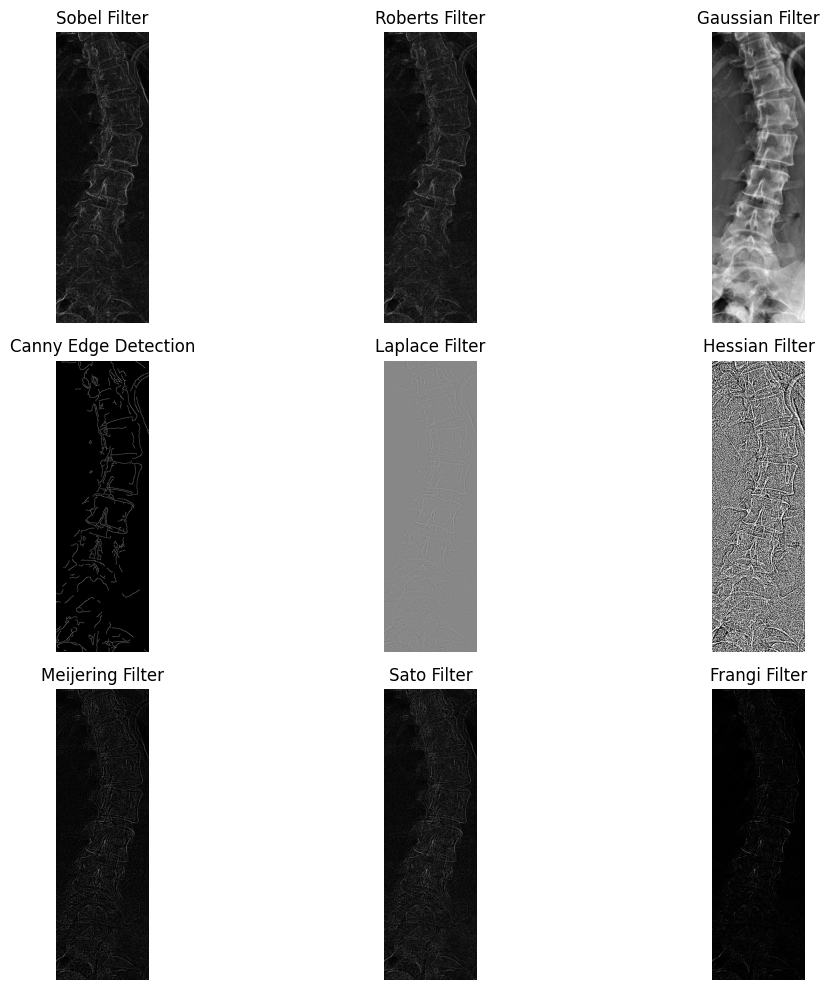

In [40]:
# Applying filters to pictures
F25_cropped = to_grayscale(F25_cropped)  # Ensure image is grayscale
F25_sobel_cropped = sobel_filter(F25_cropped)
F25_roberts_cropped = roberts_filter(F25_cropped)
F25_gaussian_cropped = gaussian_filter(F25_cropped, sigma=1)
F25_canny_cropped = canny_edge_detection(F25_cropped, sigma=2)
F25_laplace_cropped = laplace_filter(F25_cropped)
F25_hessian_cropped = hessian_filter(F25_cropped)
F25_meijering_cropped = meijering_filter(F25_cropped)
F25_sato_cropped = sato_filter(F25_cropped)
F25_frangi_cropped = frangi_filter(F25_cropped)

# Plotting the results
plt.figure(figsize=(12, 10))

# List of titles and corresponding images
titles = [
    "Sobel Filter", "Roberts Filter", "Gaussian Filter",
    "Canny Edge Detection", "Laplace Filter", "Hessian Filter",
    "Meijering Filter", "Sato Filter", "Frangi Filter"
]
filtered_images = [
    F25_sobel_cropped, F25_roberts_cropped, F25_gaussian_cropped,
    F25_canny_cropped, F25_laplace_cropped, F25_hessian_cropped,
    F25_meijering_cropped, F25_sato_cropped, F25_frangi_cropped
]

# Create subplots for each image
for i in range(len(filtered_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')  # Hide axis

plt.tight_layout()
plt.show()

In [41]:
# Function which returns an ndarray of texture scores for each pixel in the image (640x640)

def texture_score(image, roi_mask=None, sigma_min=1, sigma_max=16):
    # Convert to grayscale if needed
    if image.ndim == 3:
        image = color.rgb2gray(image)
    # Optionally crop/segment ROI
    if roi_mask is not None:
        image = image * roi_mask
        
    image = exposure.rescale_intensity(image, out_range=(0, 1))
    # Ensure image is in float format
    image = image.astype('float32')
    # Extract texture features
    features = feature.multiscale_basic_features(
        image,
        intensity=False,
        edges=False,
        texture=True,
        sigma_min=sigma_min,
        sigma_max=sigma_max,
        channel_axis=None
    )
    return features

In [42]:
# Function which returns an ndarray of edge scores for each pixel in the image (640x640)

def edge_score(image, roi_mask=None, sigma_min=1, sigma_max=16):
    # Convert to grayscale if needed
    if image.ndim == 3:
        image = color.rgb2gray(image)
    # Optionally crop/segment ROI
    if roi_mask is not None:
        image = image * roi_mask
    # Extract edge features
    features = feature.multiscale_basic_features(
        image,
        intensity=False,
        edges=True,
        texture=False,
        sigma_min=sigma_min,
        sigma_max=sigma_max,
        channel_axis=None
    )
    return features

In [43]:
# Function which returns an ndarry of texture and edge scores for each pixel in the image (640x640)

def texture_edge_score(image, roi_mask=None, sigma_min=1, sigma_max=16):
    # Convert to grayscale if needed
    if image.ndim == 3:
        image = color.rgb2gray(image)
    # Optionally crop/segment ROI
    if roi_mask is not None:
        image = image * roi_mask
    # Extract texture and edge features
    features = feature.multiscale_basic_features(
        image,
        intensity=False,
        edges=True,
        texture=True,
        sigma_min=sigma_min,
        sigma_max=sigma_max,
        channel_axis=None
    )
    return features

In [44]:
# Function which returns an ndarry of shape scores for each pixel in the image (640x640)

from skimage.feature import shape_index

def shape_score(image, roi_mask=None):
    # Convert to grayscale if needed
    if image.ndim == 3:
        image = color.rgb2gray(image)
    # Optionally crop/segment ROI
    if roi_mask is not None:
        image = image * roi_mask

    image = exposure.rescale_intensity(image, out_range=(0, 1))
    # Compute shape index
    features = shape_index(image, sigma=0.1)
    return features

In [45]:
# function to normalise and calculate scores from each index in the ndarray

def calculate_score(features):
    # features: ndarray of shape (height, width, n_features)
    # Flatten to 2D: (num_pixels, n_features)
    flat = features.reshape(-1, features.shape[-1])
    # Compute mean feature value per pixel
    pixel_means = np.nanmean(flat, axis=1)
    # Min-max normalization to [0, 10]
    min_val, max_val = pixel_means.min(), pixel_means.max()
    if max_val == min_val:
        normalized = np.zeros_like(pixel_means)
    else:
        normalized = 10 * (pixel_means - min_val) / (max_val - min_val)
    # Return overall texture score (mean of normalized values)
    return normalized.mean()

In [46]:
# Function used to display calculations for texture, edge, texture-edge, and shape scores

def display_calculations(image, title):
    print(f"Calculating scores for {title}...")
    texture = texture_score(image)
    edge = edge_score(image)
    texture_edge = texture_edge_score(image) 
    shape = shape_score(image)

    texture_mean = calculate_score(texture)
    print(f"Texture score (0-10):", texture_mean)

    edge_mean = calculate_score(edge)
    print(f"Edge score (0-10):", edge_mean)

    texture_edge_mean = calculate_score(texture_edge)
    print(f"Texture edge score (0-10):", texture_edge_mean) 

    shape_val = calculate_score(shape)
    print(f"Shape score (0-10):", shape_val) 
    return [texture_mean, edge_mean, shape_val]


In [47]:
# Calculate scores for all images and store in lists
# Lists of image titles and their corresponding variables
image_titles = [
    "F6", "F10", "F13", "F25", "F31", "F37", "F38", "F63", "F79", "M6", "M20", "M22"
]

cropped_image_titles = [
    "F6_cropped", "F10_cropped", "F13_cropped", "F25_cropped", 
    "F31_cropped", "F37_cropped", "F38_cropped", "F63_cropped", 
    "F79_cropped", "M6_cropped", "M20_cropped", "M22_cropped"
]

# Calculate scores for all images and store in lists
list_of_scores = []
list_of_scores_cropped = []

for x in range(len(images)):
    list_of_scores.append(display_calculations(images[x], image_titles[x]))

for x in range(len(cropped_images)):
    list_of_scores_cropped.append(display_calculations(cropped_images[x], cropped_image_titles[x]))

Calculating scores for F6...
Texture score (0-10): 5.428603
Edge score (0-10): 0.79625076
Texture edge score (0-10): 1.961901
Shape score (0-10): 4.7014394
Calculating scores for F10...
Texture score (0-10): 5.569553
Edge score (0-10): 0.5835672
Texture edge score (0-10): 1.6105089
Shape score (0-10): 5.067939
Calculating scores for F13...
Texture score (0-10): 5.452931
Edge score (0-10): 0.71917856
Texture edge score (0-10): 2.215991
Shape score (0-10): 4.3862767
Calculating scores for F25...
Texture score (0-10): 4.322031
Edge score (0-10): 0.330064
Texture edge score (0-10): 0.90091735
Shape score (0-10): 4.5523853
Calculating scores for F31...
Texture score (0-10): 5.8052
Edge score (0-10): 0.74854934
Texture edge score (0-10): 2.0705829
Shape score (0-10): 4.9205933
Calculating scores for F37...
Texture score (0-10): 6.1991634
Edge score (0-10): 0.34232706
Texture edge score (0-10): 0.8200831
Shape score (0-10): 5.12816
Calculating scores for F38...
Texture score (0-10): 4.277627


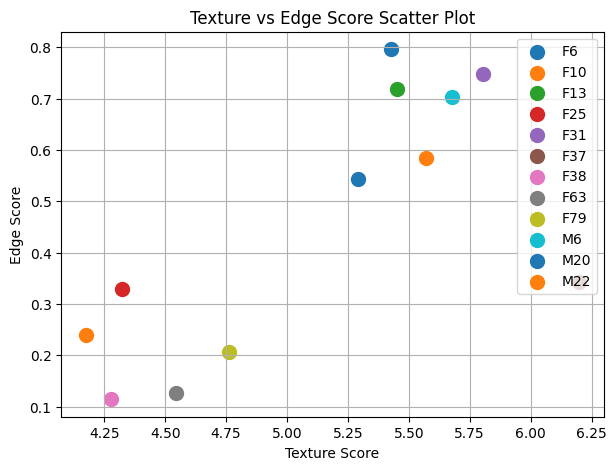

In [48]:
# Plotting texture vs edge score scatter plot

labels = ["F6", "F10", "F13", "F25",
          "F31", "F37", "F38", "F63", "F79", "M6", "M20", "M22"]
texture_scores = [score[0] for score in list_of_scores]
edge_scores = [score[1] for score in list_of_scores]
shape_scores = [score[2] for score in list_of_scores]

plt.figure(figsize=(7,5))
for i, label in enumerate(labels):
    plt.scatter(texture_scores[i], edge_scores[i], label=label, s=100)

plt.xlabel("Texture Score")
plt.ylabel("Edge Score")
plt.title("Texture vs Edge Score Scatter Plot")
plt.legend()
plt.grid(True)
plt.show()

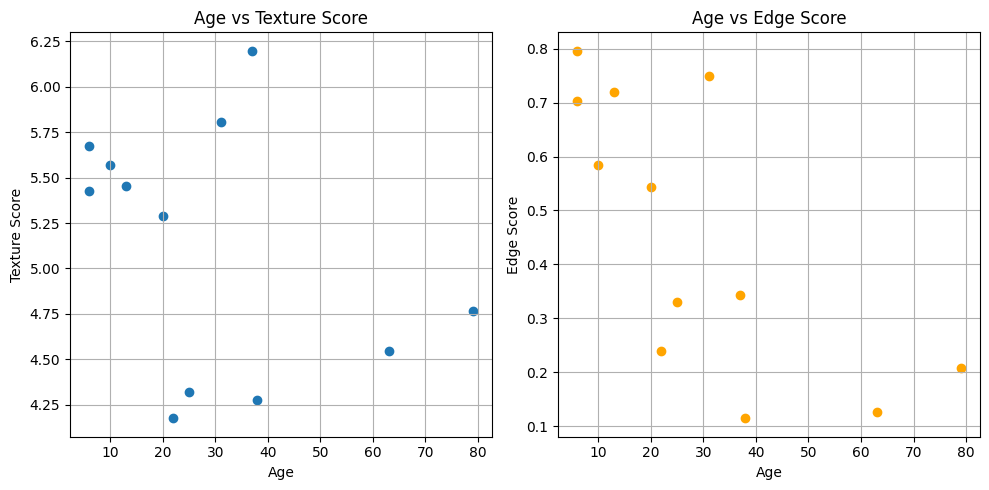

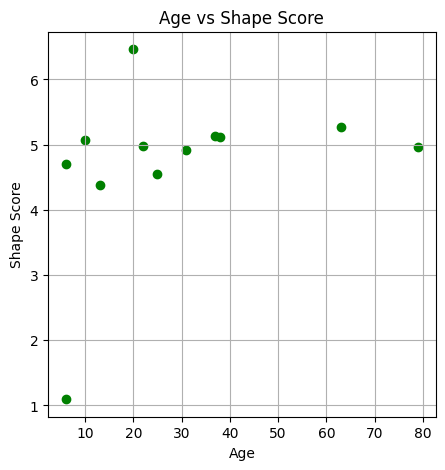

In [49]:
# Sample data (replace list_of_scores with actual scores)
data = {
    'age': [6, 10, 13, 25, 31, 37, 38, 63, 79, 6, 20, 22],
    'sex': ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'texture_score': [score[0] for score in list_of_scores],
    'edge_score': [score[1] for score in list_of_scores],
    'shape_score': [score[2] for score in list_of_scores],
    'image_angle': ['AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP']
}
df = pd.DataFrame(data)
# Save original DataFrame to CSV
df.to_csv('spine_texture_analysis.csv', index=False)

# Create a figure for Texture and Edge Scores
plt.figure(figsize=(10, 5))

# Texture Score plot
plt.subplot(1, 2, 1)
plt.scatter(df['age'], df['texture_score'], marker='o', label='Texture Score')
plt.xlabel('Age')
plt.ylabel('Texture Score')
plt.title('Age vs Texture Score')
plt.grid(True)

# Edge Score plot
plt.subplot(1, 2, 2)
plt.scatter(df['age'], df['edge_score'], marker='o', color='orange', label='Edge Score')
plt.xlabel('Age')
plt.ylabel('Edge Score')
plt.title('Age vs Edge Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Create a new figure for Shape Score
plt.figure(figsize=(5, 5))
plt.scatter(df['age'], df['shape_score'], marker='o', color='green', label='Shape Score')
plt.xlabel('Age')
plt.ylabel('Shape Score')
plt.title('Age vs Shape Score')
plt.grid(True)
plt.show()

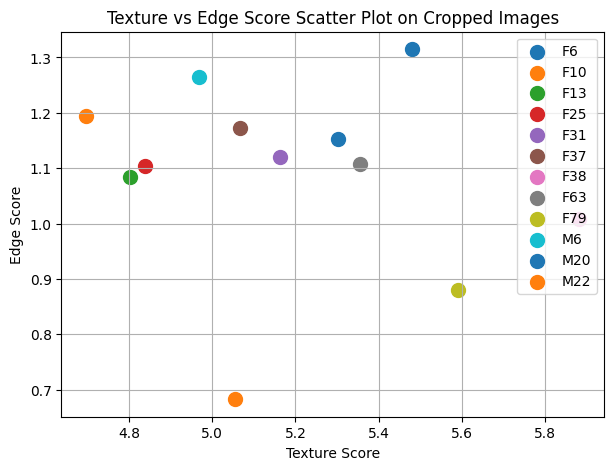

In [50]:
labels = ["F6", "F10", "F13", "F25",
          "F31", "F37", "F38", "F63", "F79", "M6", "M20", "M22"]
texture_scores = [score[0] for score in list_of_scores_cropped]
edge_scores = [score[1] for score in list_of_scores_cropped]
shape_scores = [score[2] for score in list_of_scores_cropped]

plt.figure(figsize=(7,5))
for i, label in enumerate(labels):
    plt.scatter(texture_scores[i], edge_scores[i], label=label, s=100)

plt.xlabel("Texture Score")
plt.ylabel("Edge Score")
plt.title("Texture vs Edge Score Scatter Plot on Cropped Images")
plt.legend()
plt.grid(True)
plt.show()

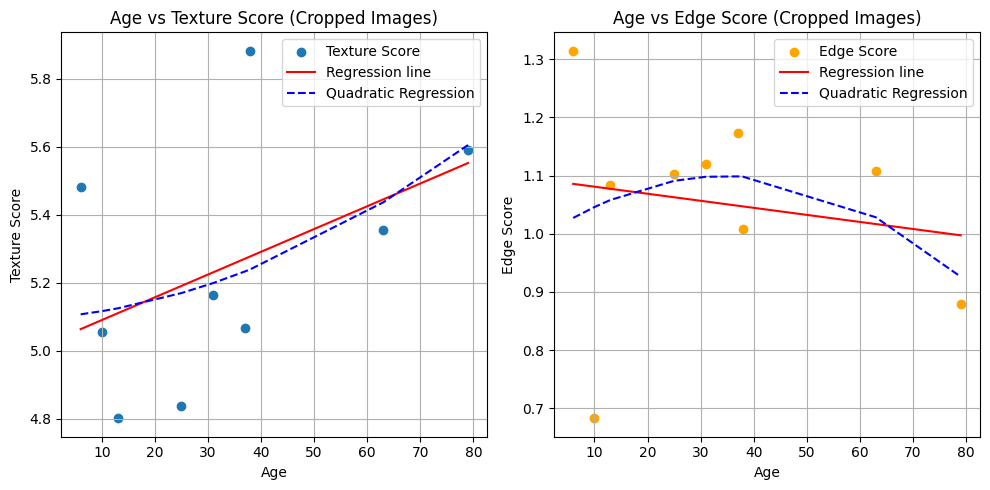

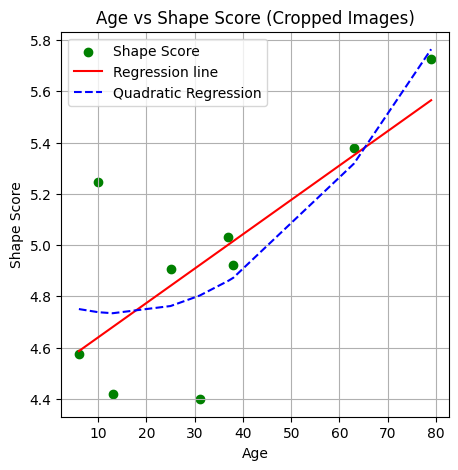

In [51]:
# create age vs texture/edge score plot for cropped images
data = {
    'age': [6, 10, 13, 25, 31, 37, 38, 63, 79, 6, 20, 22],
    'sex': ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'texture_score': [score[0] for score in list_of_scores_cropped],
    'edge_score': [score[1] for score in list_of_scores_cropped],
    'shape_score': [score[2] for score in list_of_scores_cropped],
    'image_angle': ['AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP', 'AP']
}
df = pd.DataFrame(data)
dfa = df.copy()  # Keep a copy of the original DataFrame
df = df[df['sex'] == 'F']

# Linear regression for Texture, Edge, and Shape Scores
texture_slope, texture_intercept = np.polyfit(df['age'], df['texture_score'], 1)
edge_slope, edge_intercept = np.polyfit(df['age'], df['edge_score'], 1)
shape_slope, shape_intercept = np.polyfit(df['age'], df['shape_score'], 1)
texture_regression_line = texture_slope *  df['age'] + texture_intercept
edge_regression_line = edge_slope *  df['age'] + edge_intercept
shape_regression_line = shape_slope *  df['age'] + shape_intercept

# Quadratic regression for Texture, Edge, and Shape Scores
texture_coefficients = np.polyfit(df['age'], df['texture_score'], 2)
texture_quadratic_regression_line = texture_coefficients[0] * df['age']**2 + texture_coefficients[1] * df['age'] + texture_coefficients[2]
edge_coefficients = np.polyfit(df['age'], df['edge_score'], 2)
edge_quadratic_regression_line = edge_coefficients[0] * df['age']**2 + edge_coefficients[1] * df['age'] + edge_coefficients[2]
shape_coefficients = np.polyfit(df['age'], df['shape_score'], 2)
shape_quadratic_regression_line = shape_coefficients[0] * df['age']**2 + shape_coefficients[1] * df['age'] + shape_coefficients[2]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['age'], df['texture_score'], marker='o', label='Texture Score')
plt.plot(df['age'], texture_regression_line, color='red', label='Regression line')
plt.plot(df['age'], texture_quadratic_regression_line, color='blue', linestyle='--', label='Quadratic Regression')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Texture Score')
plt.title('Age vs Texture Score (Cropped Images)')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.scatter(df['age'], df['edge_score'], marker='o', color='orange', label='Edge Score')
plt.plot(df['age'], edge_regression_line, color='red', label='Regression line')
plt.plot(df['age'], edge_quadratic_regression_line, color='blue', linestyle='--', label='Quadratic Regression')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Edge Score')
plt.title('Age vs Edge Score (Cropped Images)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a new figure for Shape Score
plt.figure(figsize=(5, 5))
plt.scatter(df['age'], df['shape_score'], marker='o', color='green', label='Shape Score')
plt.plot(df['age'], shape_regression_line, color='red', label='Regression line')
plt.plot(df['age'], shape_quadratic_regression_line, color='blue', linestyle='--', label='Quadratic Regression')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Shape Score')
plt.title('Age vs Shape Score (Cropped Images)')
plt.grid(True)
plt.show()

In [52]:
dfa.to_csv('spine_texture_analysis_cropped.csv', index=False)  # Save original DataFrame to CSV